# Capacity Test

In [2]:
# Data Analysis
import pandas as pd

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Utilities
import numpy as np
# from tqdm import tnrange
import pickle
import os
from tqdm import tqdm_notebook as tqdmn
# import warnings

In [3]:
%config InlineBackend.figure_format = 'retina'

## Small resources

In [4]:
nominal_rates_min = np.arange(10, 130, 10)
rep = 5
duration = 60

description = {}

throughput = []
response_time = []
request_rate = []

for rate_min in nominal_rates_min:
    
    print()
    
    request_rate_avg = []    
    response_time_avg = []
    throughput_avg = []
    
    for i in np.arange(1, rep+1):

        df = pd.read_csv('dataset/small/' + str(rate_min) + 'k_0' + str(i) + '.jtl')
        
        descr_name = str(rate_min) + 'k_0' + str(i)
        description[descr_name] = df.elapsed.describe()

        tot_req = df.shape[0]
        print('Total requests:', tot_req)

        nominal_rate = rate_min*1000/duration 
        print('Nominal request rate:', nominal_rate)

    #     duration = (df.timeStamp[df.shape[0]-1]-df.timeStamp[0])/1000
        actual_rate = tot_req/duration
        print('Actual request rate:', actual_rate)

        err = (df['success'] == False).sum()
        print('Errors:', err, '(' + str(err/tot_req*100) + ' %)')
        
#         elaps = df.loc[df['success']==True, 'elapsed'].median()
        elaps = df.loc[df['success']==True, 'elapsed'].mean()
        print('Avg elapsed time:', elaps)

        tp = (tot_req-err)/60       
        print('Throughput:', tp)

        print()
        
        request_rate_avg.append(actual_rate)
        response_time_avg.append(elaps)
        throughput_avg.append(tp)
    
    print('------------------------------------------')
    print()
        
    request_rate.append(nominal_rate)
#     request_rate.append(np.mean(request_rate_avg))
    response_time.append(np.mean(response_time_avg))
    throughput.append(np.mean(throughput_avg))
    
power = [throughput[i]/response_time[i] for i in range(len(throughput))]


Total requests: 10067
Nominal request rate: 166.66666666666666
Actual request rate: 167.78333333333333
Errors: 0 (0.0 %)
Avg elapsed time: 2.656998112645277
Throughput: 167.78333333333333

Total requests: 10055
Nominal request rate: 166.66666666666666
Actual request rate: 167.58333333333334
Errors: 0 (0.0 %)
Avg elapsed time: 2.554549975136748
Throughput: 167.58333333333334

Total requests: 10024
Nominal request rate: 166.66666666666666
Actual request rate: 167.06666666666666
Errors: 0 (0.0 %)
Avg elapsed time: 3.548683160415004
Throughput: 167.06666666666666

Total requests: 10033
Nominal request rate: 166.66666666666666
Actual request rate: 167.21666666666667
Errors: 0 (0.0 %)
Avg elapsed time: 2.510913983853284
Throughput: 167.21666666666667

Total requests: 10080
Nominal request rate: 166.66666666666666
Actual request rate: 168.0
Errors: 0 (0.0 %)
Avg elapsed time: 2.6287698412698415
Throughput: 168.0

------------------------------------------


Total requests: 20010
Nominal requ

c:\users\guido di chiara\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Total requests: 39963
Nominal request rate: 666.6666666666666
Actual request rate: 666.05
Errors: 10 (0.025023146410429645 %)
Avg elapsed time: 3.4644457237253774
Throughput: 665.8833333333333

Total requests: 39984
Nominal request rate: 666.6666666666666
Actual request rate: 666.4
Errors: 210 (0.5252100840336135 %)
Avg elapsed time: 3.682405591592498
Throughput: 662.9



c:\users\guido di chiara\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Total requests: 39990
Nominal request rate: 666.6666666666666
Actual request rate: 666.5
Errors: 97 (0.24256064016004 %)
Avg elapsed time: 3.777655227734189
Throughput: 664.8833333333333



c:\users\guido di chiara\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Total requests: 39889
Nominal request rate: 666.6666666666666
Actual request rate: 664.8166666666667
Errors: 73 (0.18300784677480006 %)
Avg elapsed time: 4.289029535864979
Throughput: 663.6

------------------------------------------


Total requests: 49744
Nominal request rate: 833.3333333333334
Actual request rate: 829.0666666666667
Errors: 1076 (2.1630749437118046 %)
Avg elapsed time: 7.553772499383578
Throughput: 811.1333333333333

Total requests: 49836
Nominal request rate: 833.3333333333334
Actual request rate: 830.6
Errors: 583 (1.1698370655750863 %)
Avg elapsed time: 4.389133656833086
Throughput: 820.8833333333333

Total requests: 49748
Nominal request rate: 833.3333333333334
Actual request rate: 829.1333333333333
Errors: 320 (0.6432419393744472 %)
Avg elapsed time: 5.223678886461115
Throughput: 823.8

Total requests: 49869
Nominal request rate: 833.3333333333334
Actual request rate: 831.15
Errors: 293 (0.5875393531051354 %)
Avg elapsed time: 5.384641762142972
Throughput: 826.2

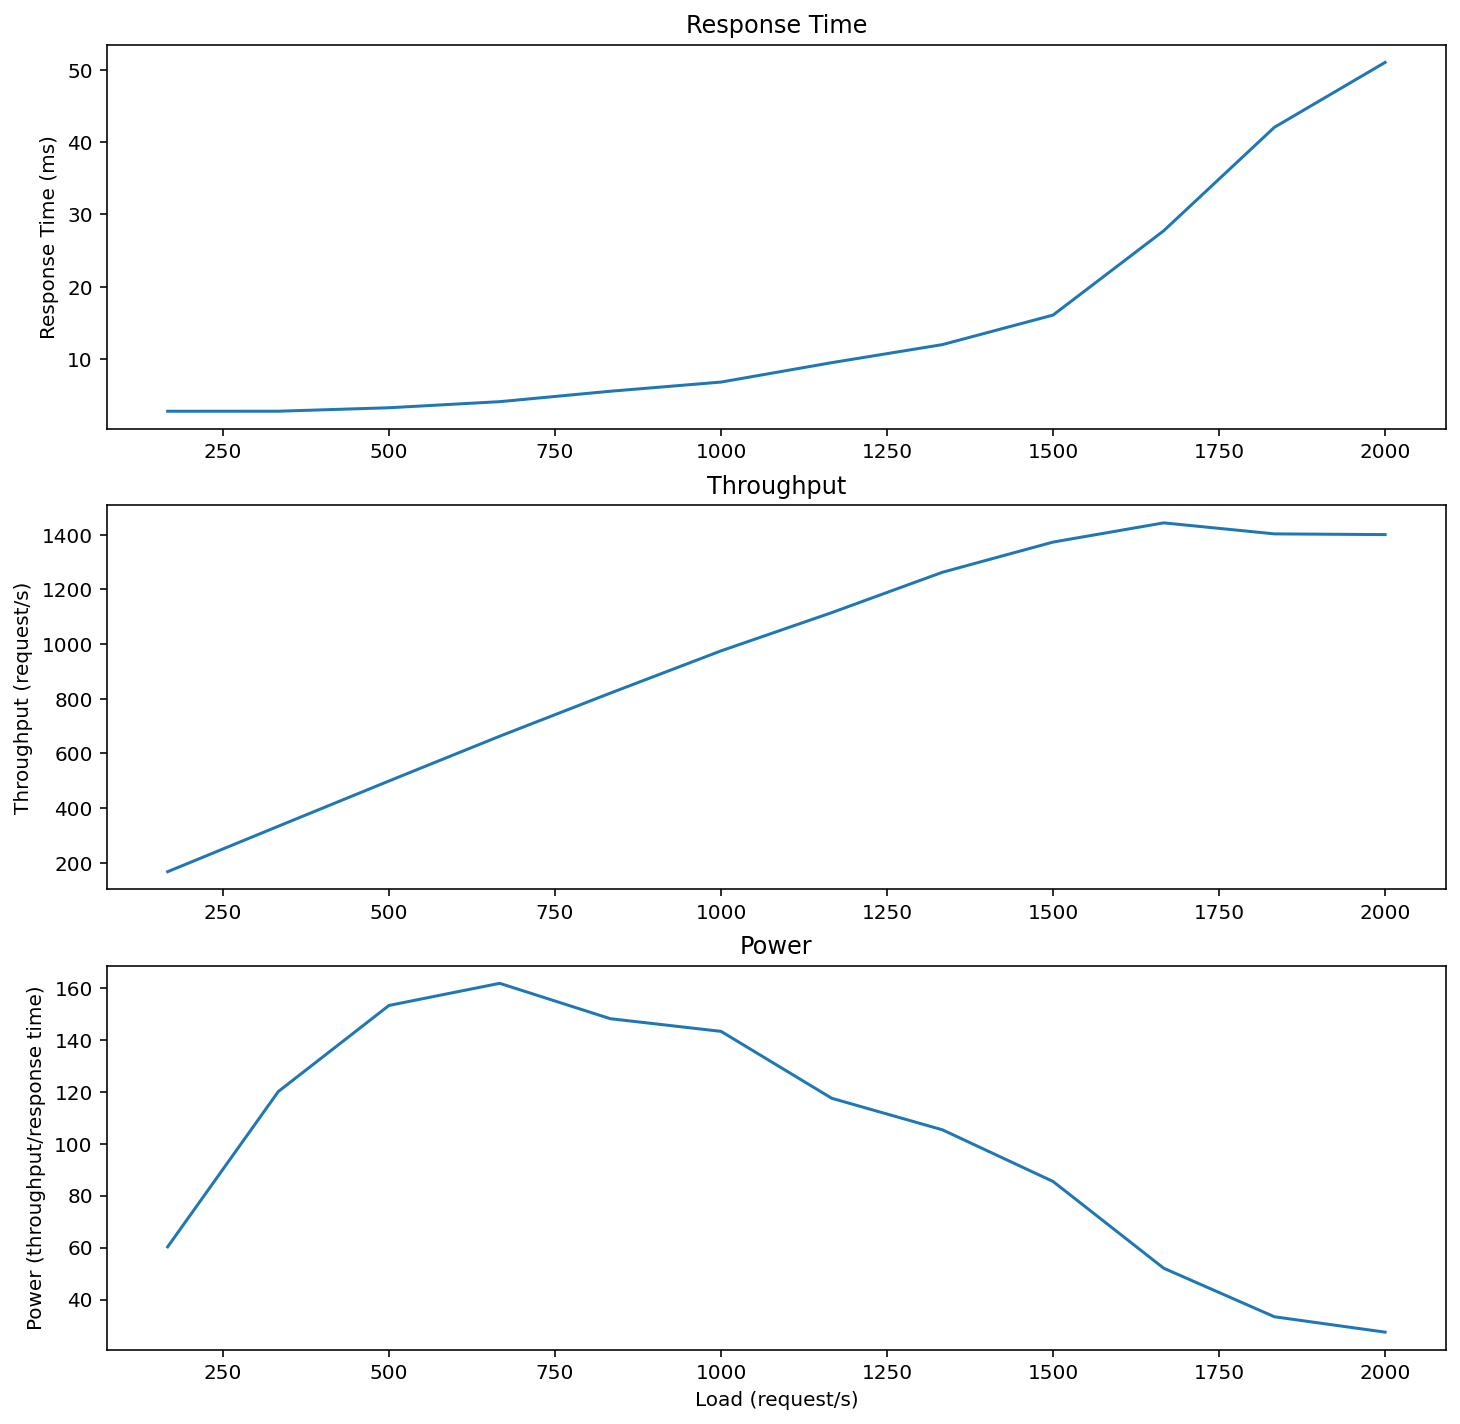

In [13]:
fig = plt.figure(figsize=(12,12))

ax0 = fig.add_subplot(3,1,1)
ax1 = fig.add_subplot(3,1,2)
ax2 = fig.add_subplot(3,1,3)

ax0.plot(request_rate, response_time)
ax1.plot(request_rate, throughput)
ax2.plot(request_rate, power)

ax0.set_title('Response Time')
# ax0.set_xlabel('Load (request/s)')
ax0.set_ylabel('Response Time (ms)')

ax1.set_title('Throughput')
# ax1.set_xlabel('Load (request/s)')
ax1.set_ylabel('Throughput (request/s)')

ax2.set_title('Power')
ax2.set_xlabel('Load (request/s)')
ax2.set_ylabel('Power (throughput/response time)')

plt.savefig("./images/Esercizio3_CT_Small.svg", format = "svg")
plt.show()

In [6]:
knee_cap_small = 40000/60 # 40k req/min (666.666 req/s)
usable_cap_small = 100000/60 # 100k req/min (1666.666 req/s)

## Large resources

In [14]:
nominal_rates_min = np.arange(2, 22, 2)
rep = 5
duration = 60

description = {}

throughput = []
response_time = []
request_rate = []

for rate_min in nominal_rates_min:
    
    print()
    
    request_rate_avg = []    
    response_time_avg = []
    throughput_avg = []
    
    for i in np.arange(1, rep+1):

        df = pd.read_csv('dataset/large/' + str(rate_min) + 'k_0' + str(i) + '.jtl')
        
        descr_name = str(rate_min) + 'k_0' + str(i)
        description[descr_name] = df.elapsed.describe()

        tot_req = df.shape[0]
        print('Total requests:', tot_req)

        nominal_rate = rate_min*1000/duration 
        print('Nominal request rate:', nominal_rate)

    #     duration = (df.timeStamp[df.shape[0]-1]-df.timeStamp[0])/1000
        actual_rate = tot_req/duration
        print('Actual request rate:', actual_rate)

        err = (df['success'] == False).sum()
        print('Errors:', err, '(' + str(err/tot_req*100) + ' %)')
        
#         elaps = df.loc[df['success']==True, 'elapsed'].median()
        elaps = df.loc[df['success']==True, 'elapsed'].mean()
        print('Avg elapsed time:', elaps)

        tp = (tot_req-err)/60       
        print('Throughput:', tp)

        print()
        
        request_rate_avg.append(actual_rate)
        response_time_avg.append(elaps)
        throughput_avg.append(tp)
    
    print('------------------------------------------')
    print()
        
    request_rate.append(nominal_rate)
#     request_rate.append(np.mean(request_rate_avg))
    response_time.append(np.mean(response_time_avg))
    throughput.append(np.mean(throughput_avg))
    
power = [throughput[i]/response_time[i] for i in range(len(throughput))]


Total requests: 2072
Nominal request rate: 33.333333333333336
Actual request rate: 34.53333333333333
Errors: 0 (0.0 %)
Avg elapsed time: 18.71814671814672
Throughput: 34.53333333333333

Total requests: 2069
Nominal request rate: 33.333333333333336
Actual request rate: 34.483333333333334
Errors: 0 (0.0 %)
Avg elapsed time: 20.364427259545675
Throughput: 34.483333333333334

Total requests: 2074
Nominal request rate: 33.333333333333336
Actual request rate: 34.56666666666667
Errors: 0 (0.0 %)
Avg elapsed time: 19.627772420443588
Throughput: 34.56666666666667

Total requests: 2069
Nominal request rate: 33.333333333333336
Actual request rate: 34.483333333333334
Errors: 0 (0.0 %)
Avg elapsed time: 21.6747220879652
Throughput: 34.483333333333334

Total requests: 2077
Nominal request rate: 33.333333333333336
Actual request rate: 34.61666666666667
Errors: 0 (0.0 %)
Avg elapsed time: 17.466538276360136
Throughput: 34.61666666666667

------------------------------------------


Total requests: 40

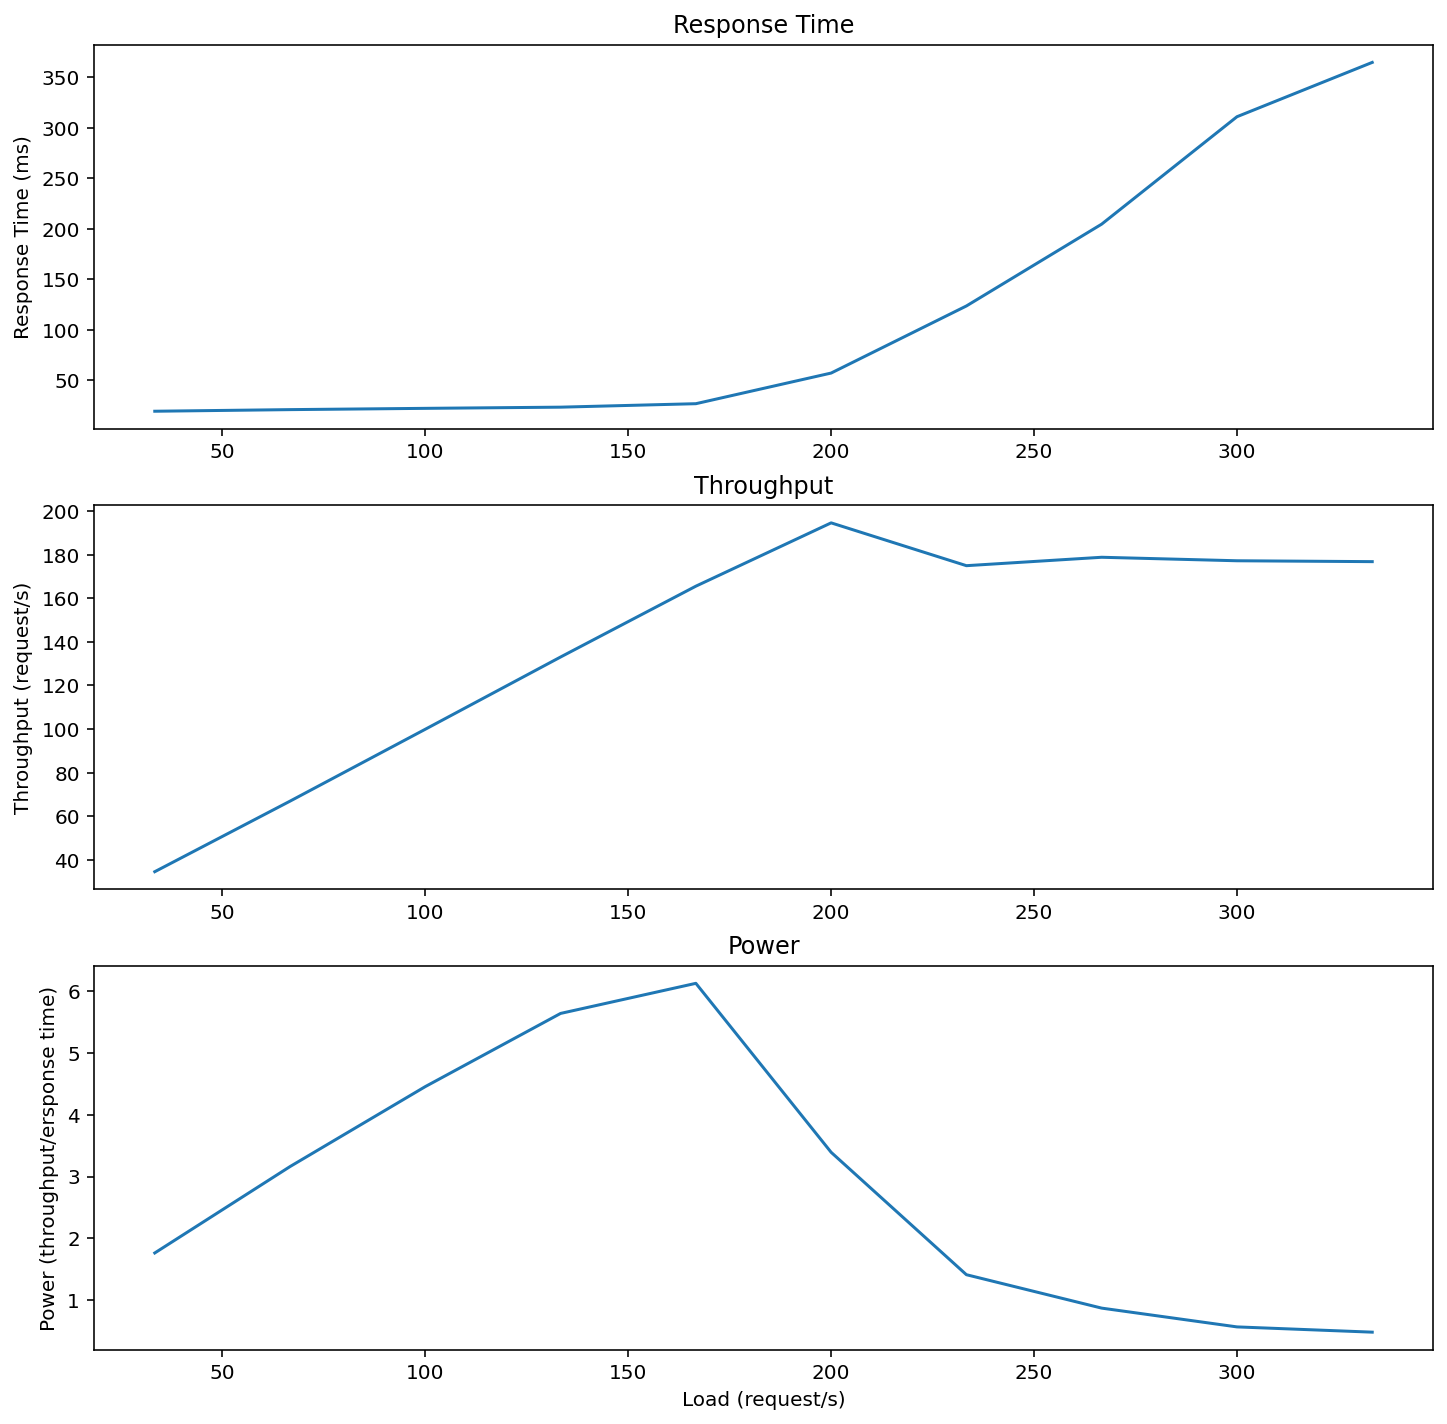

In [17]:
fig = plt.figure(figsize=(12,12))

ax0 = fig.add_subplot(3,1,1)
ax1 = fig.add_subplot(3,1,2)
ax2 = fig.add_subplot(3,1,3)

ax0.plot(request_rate, response_time)
ax1.plot(request_rate, throughput)
ax2.plot(request_rate, power)

ax0.set_title('Response Time')
# ax0.set_xlabel('Load (request/s)')
ax0.set_ylabel('Response Time (ms)')

ax1.set_title('Throughput')
# ax1.set_xlabel('Load (request/s)')
ax1.set_ylabel('Throughput (request/s)')

ax2.set_title('Power')
ax2.set_xlabel('Load (request/s)')
ax2.set_ylabel('Power (throughput/ersponse time)')
plt.savefig("./images/Esercizio3_CT_Large.svg", format = "svg")

plt.show()

In [16]:
knee_cap_large = 8000/60 # 8k req/min (133.333 req/s)
usable_cap_large = 16000/60 # 14k req/min (266.66 req/s)

## Random resources

In [18]:
nominal_rates_min = np.arange(5, 55, 5)
# nominal_rates_min = np.arange(5, 105, 5)
rep = 5
duration = 60

description = {}

throughput = []
response_time = []
request_rate = []

for rate_min in nominal_rates_min:
    
    print()
    
    request_rate_avg = []    
    response_time_avg = []
    throughput_avg = []
    
    for i in np.arange(1, rep+1):

        df = pd.read_csv('dataset/random/' + str(rate_min) + 'k_0' + str(i) + '.jtl')
        
        descr_name = str(rate_min) + 'k_0' + str(i)
        description[descr_name] = df.elapsed.describe()

        tot_req = df.shape[0]
        print('Total requests:', tot_req)

        nominal_rate = rate_min*1000/duration 
        print('Nominal request rate:', nominal_rate)

    #     duration = (df.timeStamp[df.shape[0]-1]-df.timeStamp[0])/1000
        actual_rate = tot_req/duration
        print('Actual request rate:', actual_rate)

        err = (df['success'] == False).sum()
        print('Errors:', err, '(' + str(err/tot_req*100) + ' %)')
        
#         elaps = df.loc[df['success']==True, 'elapsed'].median()
        elaps = df.loc[df['success']==True, 'elapsed'].mean()
        print('Avg elapsed time:', elaps)

        tp = (tot_req-err)/60       
        print('Throughput:', tp)

        print()
        
        request_rate_avg.append(actual_rate)
        response_time_avg.append(elaps)
        throughput_avg.append(tp)
    
    print('------------------------------------------')
    print()
        
    request_rate.append(nominal_rate)
#     request_rate.append(np.mean(request_rate_avg))
    response_time.append(np.mean(response_time_avg))
    throughput.append(np.mean(throughput_avg))
    
power = [throughput[i]/response_time[i] for i in range(len(throughput))]


Total requests: 5072
Nominal request rate: 83.33333333333333
Actual request rate: 84.53333333333333
Errors: 0 (0.0 %)
Avg elapsed time: 9.08103312302839
Throughput: 84.53333333333333

Total requests: 5076
Nominal request rate: 83.33333333333333
Actual request rate: 84.6
Errors: 0 (0.0 %)
Avg elapsed time: 7.64736012608353
Throughput: 84.6

Total requests: 5061
Nominal request rate: 83.33333333333333
Actual request rate: 84.35
Errors: 0 (0.0 %)
Avg elapsed time: 7.716854376605414
Throughput: 84.35

Total requests: 5076
Nominal request rate: 83.33333333333333
Actual request rate: 84.6
Errors: 0 (0.0 %)
Avg elapsed time: 8.52836879432624
Throughput: 84.6

Total requests: 5077
Nominal request rate: 83.33333333333333
Actual request rate: 84.61666666666666
Errors: 0 (0.0 %)
Avg elapsed time: 8.578097301556037
Throughput: 84.61666666666666

------------------------------------------


Total requests: 10043
Nominal request rate: 166.66666666666666
Actual request rate: 167.38333333333333
Error

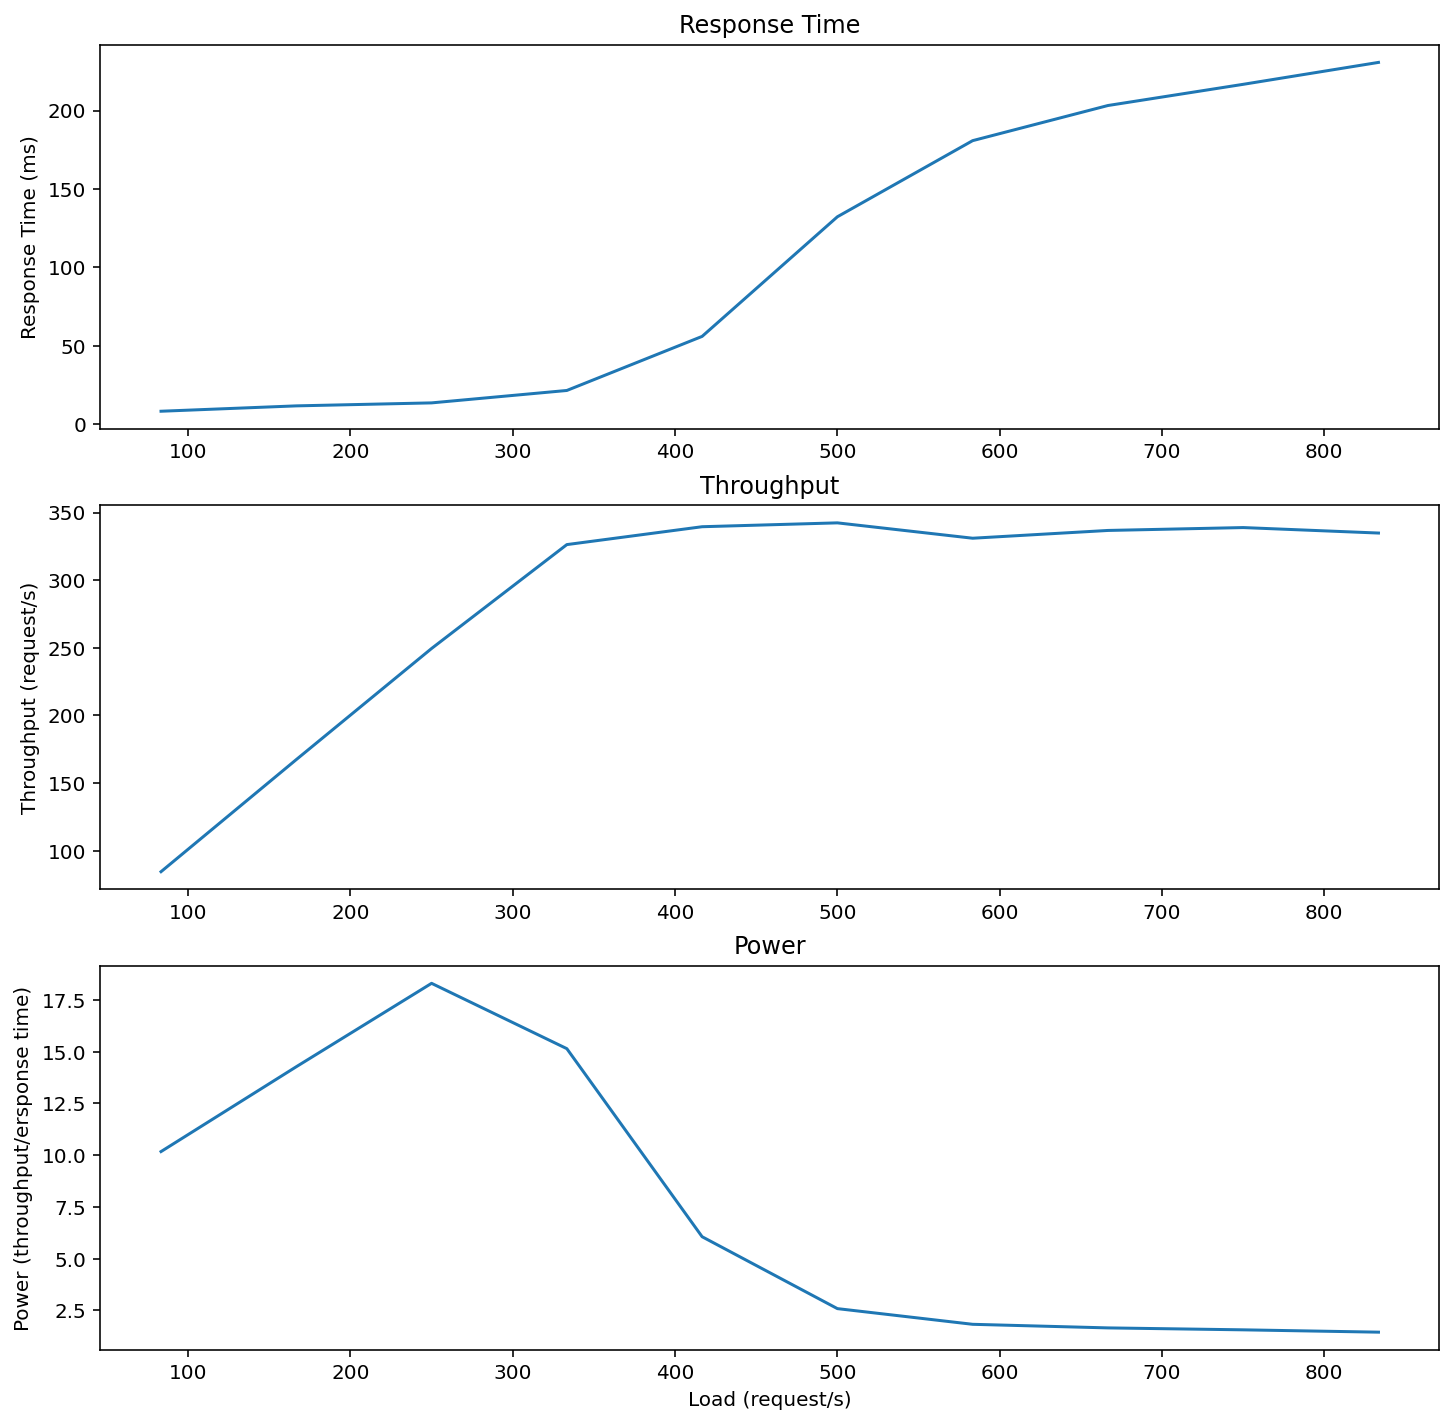

In [19]:
fig = plt.figure(figsize=(12,12))

ax0 = fig.add_subplot(3,1,1)
ax1 = fig.add_subplot(3,1,2)
ax2 = fig.add_subplot(3,1,3)

ax0.plot(request_rate, response_time)
ax1.plot(request_rate, throughput)
ax2.plot(request_rate, power)

ax0.set_title('Response Time')
# ax0.set_xlabel('Load (request/s)')
ax0.set_ylabel('Response Time (ms)')

ax1.set_title('Throughput')
# ax1.set_xlabel('Load (request/s)')
ax1.set_ylabel('Throughput (request/s)')

ax2.set_title('Power')
ax2.set_xlabel('Load (request/s)')
ax2.set_ylabel('Power (throughput/ersponse time)')

plt.savefig("./images/Esercizio3_CT_Random.svg", format = "svg")

plt.show()

In [20]:
knee_cap_random = 15000/60 # 15k req/min (250 req/s)
usable_cap_random = 35000/60 # 35k req/min (583 req/s)

## Final capacities

In [13]:
knee_cap = (knee_cap_small + knee_cap_large + knee_cap_random)/3
usable_cap = (usable_cap_small + usable_cap_large + usable_cap_random)/3

print('Small resources capacities')
print('\t Knee capacity:', knee_cap_small, 'req/s')
print('\t Usable capacity:', usable_cap_small, 'req/s')
# print()

print('Large resources capacities')
print('\t Knee capacity:', knee_cap_large, 'req/s')
print('\t Usable capacity:', usable_cap_large, 'req/s')
print()

print('Random resources capacities')
print('\t Knee capacity:', knee_cap_random, 'req/s')
print('\t Usable capacity:', usable_cap_random, 'req/s')
print()

print('Average capacities')
print('\t Knee capacity:', knee_cap, 'req/s')
print('\t Usable capacity:', usable_cap, 'req/s')

Small resources capacities
	 Knee capacity: 666.6666666666666 req/s
	 Usable capacity: 1666.6666666666667 req/s
Large resources capacities
	 Knee capacity: 133.33333333333334 req/s
	 Usable capacity: 266.6666666666667 req/s

Random resources capacities
	 Knee capacity: 250.0 req/s
	 Usable capacity: 583.3333333333334 req/s

Average capacities
	 Knee capacity: 350.0 req/s
	 Usable capacity: 838.888888888889 req/s


In [22]:
usable_cap_doe = 500
usable_cap1 = 0.25 * usable_cap_doe
usable_cap2 = 0.50 * usable_cap_doe
usable_cap3 = 0.75 * usable_cap_doe

print('Level 1 (0.25% of usable capacity):', usable_cap1, 'req/s')
print('Level 2 (0.50% of usable capacity):', usable_cap2, 'req/s')
print('Level 3 (0.75% of usable capacity):', usable_cap3, 'req/s')

Level 1 (0.25% of usable capacity): 125.0 req/s
Level 2 (0.50% of usable capacity): 250.0 req/s
Level 3 (0.75% of usable capacity): 375.0 req/s


In [ ]:
# usable_cap_doe = 583
# usable_cap1 = 0.25 * usable_cap_doe
# usable_cap2 = 0.50 * usable_cap_doe
# usable_cap3 = 0.75 * usable_cap_doe

# print('Level 1 (0.25% of usable capacity):', usable_cap1, 'req/s')
# print('Level 2 (0.50% of usable capacity):', usable_cap2, 'req/s')
# print('Level 3 (0.75% of usable capacity):', usable_cap3, 'req/s')